In [1]:
pip install tensorflow_addons

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pip

In [3]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
IMG_SIZE = 224
BATCH_SIZE = 32
NO_EPOCHS = 20
NUM_CLASSES = 2
DATA_FOLDER = "C:/Users/ADMIN/Desktop/Training Images"
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm
import cv2 as cv
from random import shuffle 
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
# from keras.utils import plot_model
from keras.applications.resnet import ResNet50
from tensorflow.keras import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
import tensorflow_addons as tfa
import tensorflow as tf
%matplotlib inline 
from keras.utils.vis_utils import plot_model, model_to_dot
from IPython.display import SVG

D:\Anaconda\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
D:\Anaconda\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.11.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and su

In [7]:
data_df = pd.read_excel(open("data.xlsx", 'rb'), sheet_name='Sheet1')

In [8]:
data_df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0
3496,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
3497,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0
3498,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0


In [9]:
data_df.columns = ["id", 'age', "sex", "left_fundus", "right_fundus", "left_diagnosys", "right_diagnosys", "normal",
                  "diabetes", "glaucoma", "cataract", "amd", "hypertension", "myopia", "other"]

In [10]:
print(data_df.loc[(data_df.cataract==1)].shape)
print(data_df.loc[data_df.cataract==0].shape)

(212, 15)
(3288, 15)


In [11]:
data_df.loc[(data_df.cataract==1)]['left_diagnosys'].value_counts()

cataract                                                                   135
normal fundus                                                               24
cataract，lens dust                                                           8
moderate non proliferative retinopathy                                       6
lens dust，cataract                                                           5
mild nonproliferative retinopathy                                            5
lens dust，normal fundus                                                      4
cataract，moderate non proliferative retinopathy                              3
refractive media opacity                                                     3
normal fundus，lens dust                                                      3
severe proliferative diabetic retinopathy                                    2
cataract，mild nonproliferative retinopathy                                   2
drusen，cataract，lens dust                           

In [12]:
data_df.loc[(data_df.cataract==1)]['right_diagnosys'].value_counts()


cataract                                                                  127
normal fundus                                                              24
moderate non proliferative retinopathy                                      9
cataract，lens dust                                                          6
drusen                                                                      5
lens dust，cataract                                                          5
mild nonproliferative retinopathy                                           4
refractive media opacity                                                    4
macular epiretinal membrane                                                 3
epiretinal membrane                                                         3
cataract，moderate non proliferative retinopathy                             3
moderate non proliferative retinopathy，cataract                             3
hypertensive retinopathy，cataract                               

In [13]:
def has_cataract_mentioned(text):
    if 'cataract' in text:
        return 1
    else:
        return 0

In [14]:
data_df['le_cataract'] = data_df['left_diagnosys'].apply(lambda x: has_cataract_mentioned(x))
data_df['re_cataract'] = data_df['right_diagnosys'].apply(lambda x: has_cataract_mentioned(x))

In [15]:
cataract_le_list = data_df.loc[(data_df.cataract==1) & (data_df.le_cataract==1)]['left_fundus'].values
cataract_re_list = data_df.loc[(data_df.cataract==1) & (data_df.re_cataract==1)]['right_fundus'].values
print(len(cataract_le_list), len(cataract_re_list))
non_cataract_le_list = data_df.loc[(data_df.cataract==0) & (data_df.left_diagnosys=="normal fundus")]['left_fundus'].sample(150, random_state=314).values
non_cataract_re_list = data_df.loc[(data_df.cataract==0) & (data_df.right_diagnosys=="normal fundus")]['right_fundus'].sample(150, random_state=314).values
print(len(non_cataract_le_list), len(non_cataract_re_list))

159 154
150 150


In [16]:
cataract_list = np.concatenate((cataract_le_list, cataract_re_list), axis = 0)
non_cataract_list = np.concatenate((non_cataract_le_list, non_cataract_re_list), axis = 0)
print(len(non_cataract_list), len(cataract_list))

300 313


In [17]:
print(len(os.listdir(DATA_FOLDER)))

7000


In [18]:
def label_image(label):
    if label == 1:
        return [1,0]
    elif label == 0: 
        return [0,1]

def process_data(data_image_list, DATA_FOLDER, is_cataract):
    data_df = []
    for img in tqdm(data_image_list):
        path = os.path.join(DATA_FOLDER,img)
        label = label_image(is_cataract)
        img = cv.imread(path,cv.IMREAD_COLOR)
        img = cv.resize(img, (IMG_SIZE,IMG_SIZE))
        data_df.append([np.array(img),np.array(label)])
    shuffle(data_df)
    return data_df

In [19]:
cat_df = process_data(cataract_list, DATA_FOLDER, 1)

100%|██████████| 313/313 [00:17<00:00, 18.31it/s]


In [20]:
cat_no_df = process_data(non_cataract_list, DATA_FOLDER, 0)

100%|██████████| 300/300 [00:16<00:00, 17.70it/s]


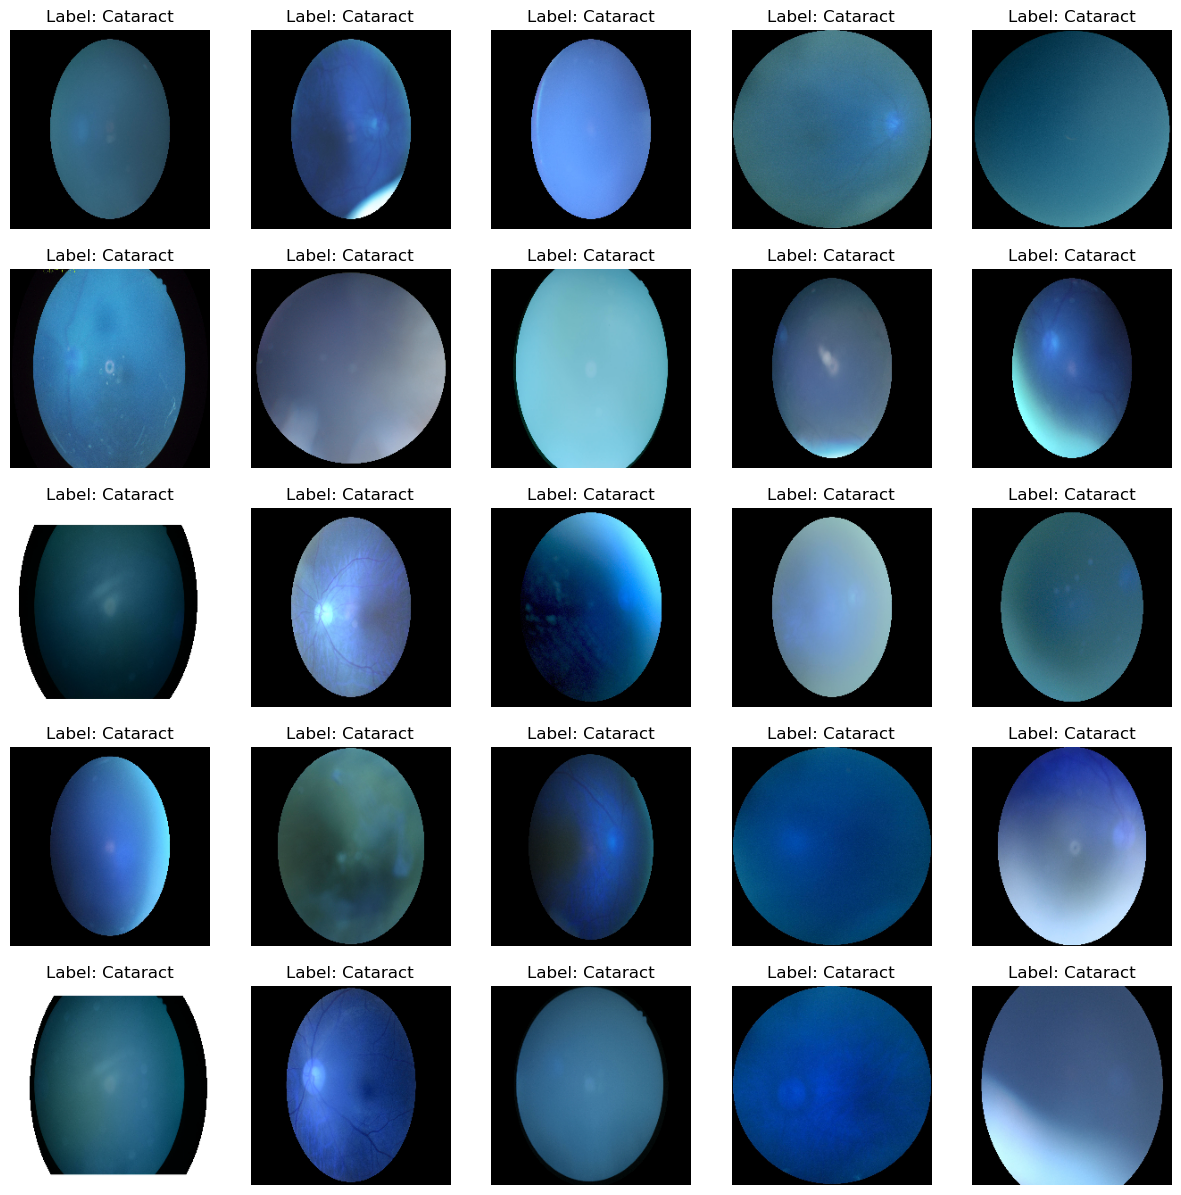

In [21]:
def show_images(data, isTest=False):
    f, ax = plt.subplots(5,5, figsize=(15,15))
    for i,data in enumerate(data[:25]):
        img_num = data[1]
        img_data = data[0]
        label = np.argmax(img_num)
        if label  == 0: 
            str_label='Cataract'
        elif label == 1: 
            str_label='No Cataract'
        if(isTest):
            str_label="None"
        ax[i//5, i%5].imshow(img_data)
        ax[i//5, i%5].axis('off')
        ax[i//5, i%5].set_title("Label: {}".format(str_label))
    plt.show()

show_images(cat_df)


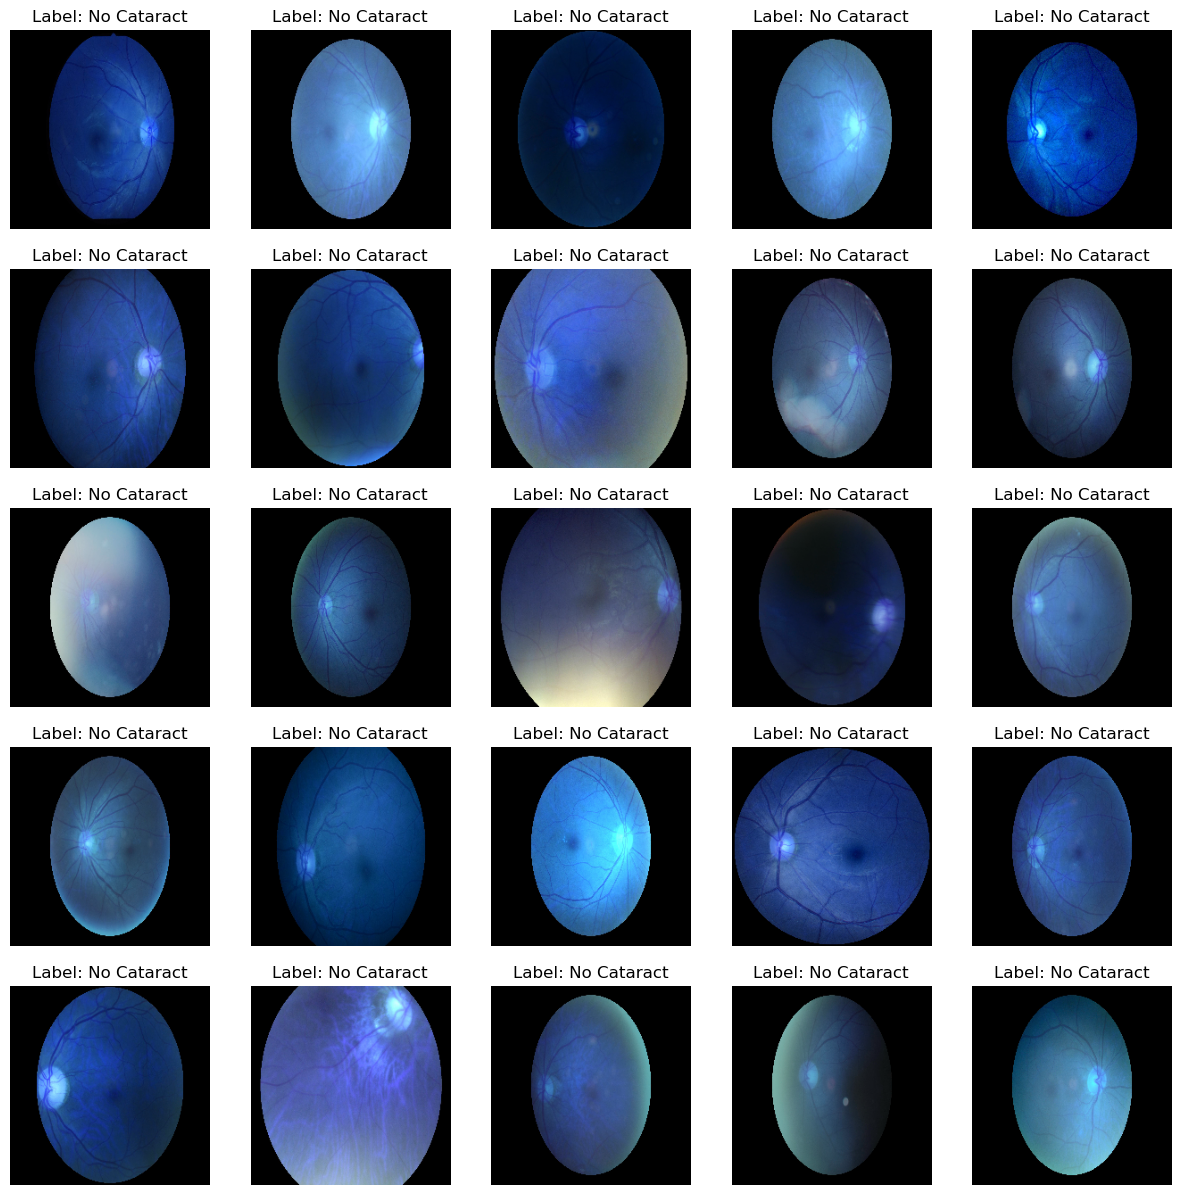

In [22]:
show_images(cat_no_df)

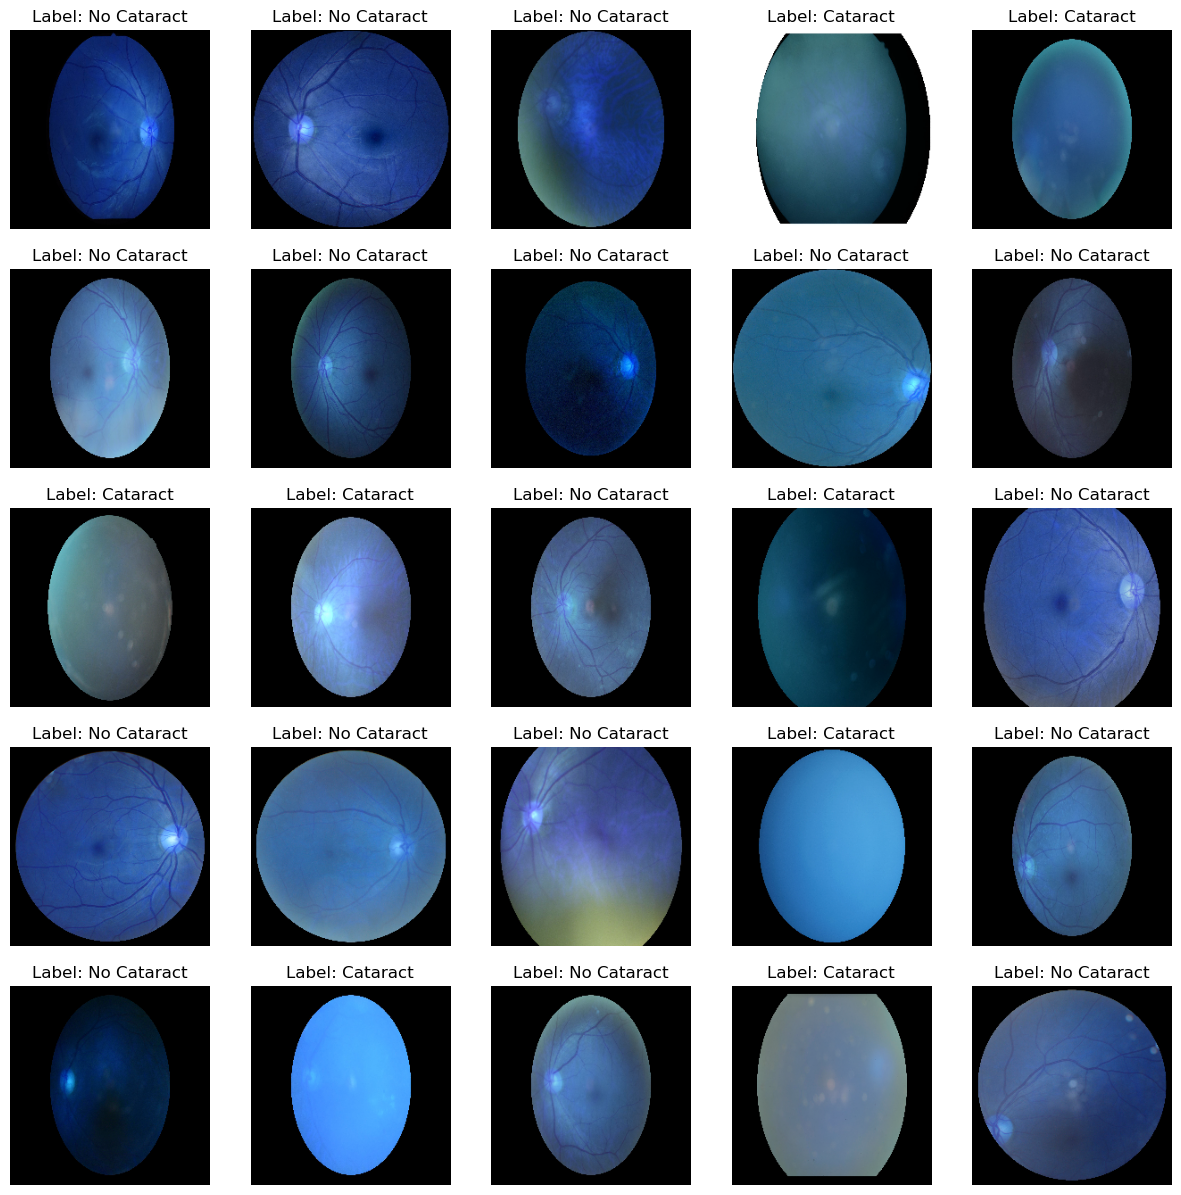

In [23]:
train = cat_df + cat_no_df
shuffle(train)
show_images(train)

In [24]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
y = np.array([i[1] for i in train])

In [25]:
model = Sequential()
model.add(ResNet50(include_top=False, pooling='max', weights='imagenet'))
model.add(Dense(NUM_CLASSES, activation='softmax'))
# ResNet-50 model is already trained, should not be trained
model.layers[0].trainable = True


In [26]:
opt = tfa.optimizers.LazyAdam()
loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.025)
model.compile(optimizer='sgd', loss=loss, metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2)                4098      
 er)                                                             
                                                                 
Total params: 23,591,810
Trainable params: 23,538,690
Non-trainable params: 53,120
_________________________________________________________________


In [28]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [29]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [30]:
train_model = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/20
16/16 [==============================] - 217s 11s/step - loss: 31.4131 - accuracy: 0.6041 - val_loss: 58899.8555 - val_accuracy: 0.5122
Epoch 2/20
16/16 [==============================] - 164s 10s/step - loss: 2.7593 - accuracy: 0.6122 - val_loss: 34313.2852 - val_accuracy: 0.4878
Epoch 3/20
16/16 [==============================] - 163s 10s/step - loss: 2.1280 - accuracy: 0.6429 - val_loss: 2723.4443 - val_accuracy: 0.4878
Epoch 4/20
16/16 [==============================] - 163s 10s/step - loss: 1.6587 - accuracy: 0.6816 - val_loss: 743.6271 - val_accuracy: 0.4878
Epoch 5/20
16/16 [==============================] - 164s 10s/step - loss: 1.0113 - accuracy: 0.7612 - val_loss: 9.4017 - val_accuracy: 0.6829
Epoch 6/20
16/16 [==============================] - 166s 10s/step - loss: 0.5580 - accuracy: 0.8082 - val_loss: 4.9193 - val_accuracy: 0.6911
Epoch 7/20
16/16 [==============================] - 165s 10s/step - loss: 0.5474 - accuracy: 0.8449 - val_loss: 1.2572 - val_accuracy:

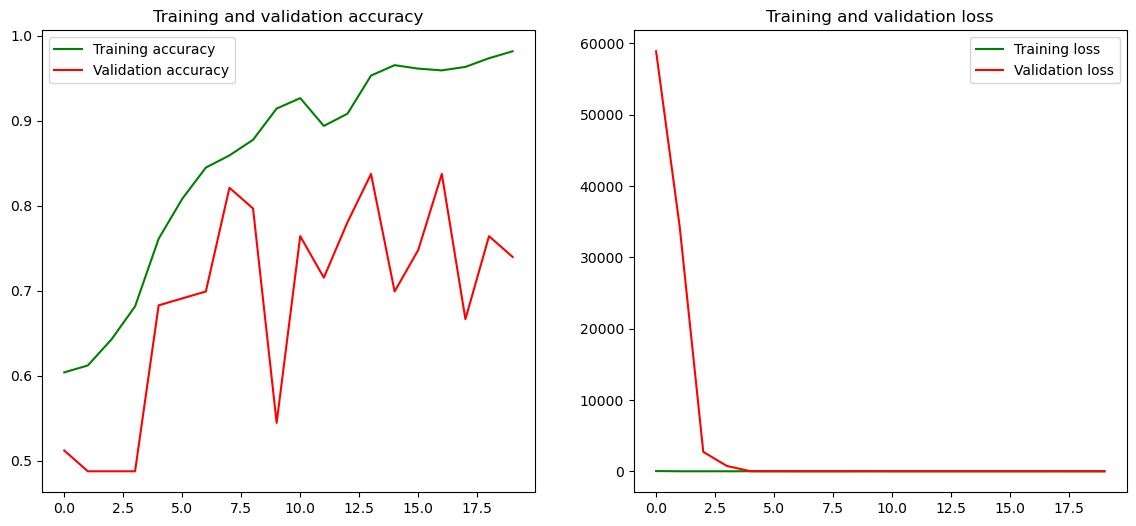

In [32]:
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(14,6))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    plt.show()
plot_accuracy_and_loss(train_model)

In [35]:
score = model.evaluate(X_val, y_val, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 1.0151499509811401
Validation accuracy: 0.7398374080657959


In [36]:
# Get the predictions for the test data
predicted_probs = model.predict(X_val)
predicted_classes = np.argmax(predicted_probs, axis=1)

# Get the indices to be plotted
y_true = np.argmax(y_val, axis=1)


4/4 [==============================] - 11s 2s/step


In [37]:
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [38]:
target_names = ["Cataract", "Normal"]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

    Cataract       0.97      0.51      0.67        63
      Normal       0.66      0.98      0.79        60

    accuracy                           0.74       123
   macro avg       0.81      0.75      0.73       123
weighted avg       0.82      0.74      0.73       123

